<a href="https://colab.research.google.com/github/mehdimerbah/COVID19_fake_news_detection/blob/main/models/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library and Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense
import json

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mehdimerbah/COVID19_fake_news_detection/main/preprocessing/whole_processed_data.csv')

# One-Hot Data Representation  
hot representation is a type of encoding that we would use for categorical data to turn it into a numerical value in the feature vector. We used the one_hot encoding to then create an embedded dataset, with padding. The padding function makes sure to leave room for words unavailable in some sentences.    

In [ ]:
oh_representation = [one_hot(terms, 1000) for terms in dataset['tweet']]

In [ ]:
sentence_len = 50
embedded_data = pad_sequences(oh_representation, padding='pre', maxlen=sentence_len)

In [ ]:
embedded_data[:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 453,   3, 885, 639, 587, 778, 862, 729, 977,
        927, 314, 285, 543, 729, 954, 118, 384, 124, 687, 905],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 115, 989,
        885, 587, 285, 240, 489, 977, 444, 115, 989,  98, 587],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 838,
         31, 524, 286, 341, 536, 278, 169, 354, 380, 860, 452],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
     

In [ ]:
# For easier manipulation I will transform the 2D array into a pandas DataFrame
embedded_DF = pd.DataFrame(embedded_data)
# Adding one column for the class labels to the DF
embedded_DF['label'] = dataset['label']
# Converting the lables from (real/fake) strings to (1/0)
embedded_DF['label'] = embedded_DF.label.eq('real').mul(1)

# Data Splitting
training_set = embedded_DF.iloc[:6420]
validation_set = embedded_DF.iloc[6420:8560]
testing_set = embedded_DF.iloc[8560:]
embedded_DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,453,3,885,639,587,778,862,729,977,927,314,285,543,729,954,118,384,124,687,905,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115,989,885,587,285,240,489,977,444,115,989,98,587,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,838,31,524,286,341,536,278,169,354,380,860,452,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,636,801,347,174,482,85,22,18,109,131,567,742,504,481,844,290,903,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,465,115,231,946,138,977,172,114,192,130,26,905,677,160,115,9,192,130,26,812,876,698,535,47,106,516,110,988,138,356,1


# Building the Model

In [ ]:
# initializing model
model = Sequential()
# adding embedding layer
model.add(Embedding(1000, 100, input_length=sentence_len))
model.add(LSTM(150))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           100000    
                                                                 
 lstm_1 (LSTM)               (None, 150)               150600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 250,751
Trainable params: 250,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(training_set.iloc[:,:50], training_set.iloc[:,50], validation_data=(validation_set.iloc[:,:50], validation_set.iloc[:,50] ), epochs=10, batch_size=64)

Epoch 1/10
101/101 [==============================] - 19s 157ms/step - loss: 0.4549 - accuracy: 0.7921 - val_loss: 0.2938 - val_accuracy: 0.8766
Epoch 2/10
101/101 [==============================] - 15s 153ms/step - loss: 0.2466 - accuracy: 0.9003 - val_loss: 0.2806 - val_accuracy: 0.8864
Epoch 3/10
101/101 [==============================] - 15s 150ms/step - loss: 0.1970 - accuracy: 0.9246 - val_loss: 0.2890 - val_accuracy: 0.8762
Epoch 4/10
101/101 [==============================] - 15s 150ms/step - loss: 0.1638 - accuracy: 0.9399 - val_loss: 0.3228 - val_accuracy: 0.8776
Epoch 5/10
101/101 [==============================] - 15s 151ms/step - loss: 0.1392 - accuracy: 0.9494 - val_loss: 0.2943 - val_accuracy: 0.8893
Epoch 6/10
101/101 [==============================] - 15s 147ms/step - loss: 0.1206 - accuracy: 0.9578 - val_loss: 0.3185 - val_accuracy: 0.8822
Epoch 7/10
101/101 [==============================] - 15s 148ms/step - loss: 0.1022 - accuracy: 0.9659 - val_loss: 0.3361 - val_ac

In [ ]:
# Now we can use the model to make some predictions.
## The predictions values are squeezed between 0 and 1 by the sigmoid activation 
## We need to convert them to 1 or 0, to fit the classes
predictions = model.predict(validation_set.iloc[:,:50])
predictions[:5]

array([[4.2796135e-04],
       [9.8690557e-01],
       [1.1801055e-01],
       [3.0583143e-04],
       [9.9897474e-01]], dtype=float32)

In [ ]:
# To convert the values, we simply compare to 0.5 and round it
predictions = (predictions > 0.5).astype("int32")
predictions

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

# Results

In [ ]:
print(classification_report(validation_set['label'], predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1020
           1       0.89      0.87      0.88      1120

    accuracy                           0.88      2140
   macro avg       0.88      0.88      0.88      2140
weighted avg       0.88      0.88      0.88      2140



In [ ]:
round(accuracy_score(validation_set['label'], predictions), 5)

0.8757

In [ ]:
def get_metrics(predicted,true):
    metrics = dict()
    metrics['accuracy'] = round(accuracy_score(predicted, true), 5)
    metrics['precision'] = round(precision_score(predicted, true, average = 'weighted'), 5)
    metrics['recall'] = round(recall_score(predicted, true, average = 'weighted'), 5)
    metrics['f1'] = round(f1_score(predicted, true, average = 'weighted'), 5)
    
    return metrics
    

In [ ]:
metrics = get_metrics(predictions, validation_set['label'])
print(metrics)

{'accuracy': 0.8757, 'precision': 0.87582, 'recall': 0.8757, 'f1': 0.87565}


In [ ]:
with open("LSTM_results.json", "w") as output:
    json.dump(metrics, output)

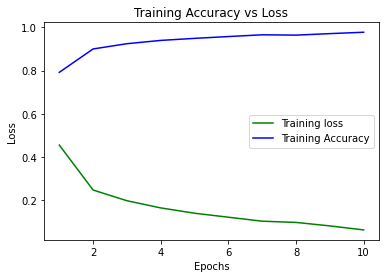

In [ ]:
## Plot accuracy vs Loss
loss_train = model_history.history['loss']
#loss_val = model_history.history['val_loss']
acc_training = model_history.history['accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
#plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, acc_training, 'b', label='Training Accuracy')
plt.title('Training Accuracy vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

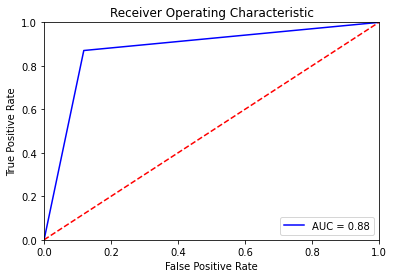

In [ ]:
fpr, tpr, threshold = roc_curve(validation_set['label'], predictions)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()